# Dynamic Programming - Group 'Lost in Optimization' - Main python notebook

Install dependencies and set magics:

In [1]:
%load_ext autoreload
%autoreload 2

#%pip install EconModel
#%pip install ConSav
#%pip install quantecon

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import os
nb.set_num_threads(4) #perhaps set to 8

# load the DurableConsumptionModel module
from DurableConsumptionModel import DurableConsumptionModelClass

## Initial solve of the models

Set amount of periods:

In [3]:
model_negm = DurableConsumptionModelClass(name='example_negm',par={'solmethod':'negm','do_print':False})
model_negm.precompile_numba() # solve with very coarse grids
model_negm.solve()
model_negm.simulate()

precompiling numba functions
solving the model
Period: 1
Beta index: 0
Beta index: 1
Beta index: 2
Period: 0
Beta index: 0
Beta index: 1
Beta index: 2
numba precompile done
solving the model
Period: 59
Beta index: 0
Beta index: 1
Beta index: 2
Period: 58
Beta index: 0
Beta index: 1
Beta index: 2
Period: 57
Beta index: 0
Beta index: 1
Beta index: 2
Period: 56
Beta index: 0
Beta index: 1
Beta index: 2
Period: 55
Beta index: 0
Beta index: 1
Beta index: 2
Period: 54
Beta index: 0
Beta index: 1
Beta index: 2
Period: 53
Beta index: 0
Beta index: 1
Beta index: 2
Period: 52
Beta index: 0
Beta index: 1
Beta index: 2
Period: 51
Beta index: 0
Beta index: 1
Beta index: 2
Period: 50
Beta index: 0
Beta index: 1
Beta index: 2
Period: 49
Beta index: 0
Beta index: 1
Beta index: 2
Period: 48
Beta index: 0
Beta index: 1
Beta index: 2
Period: 47
Beta index: 0
Beta index: 1
Beta index: 2
Period: 46
Beta index: 0
Beta index: 1
Beta index: 2
Period: 45
Beta index: 0
Beta index: 1
Beta index: 2
Period: 44
Bet

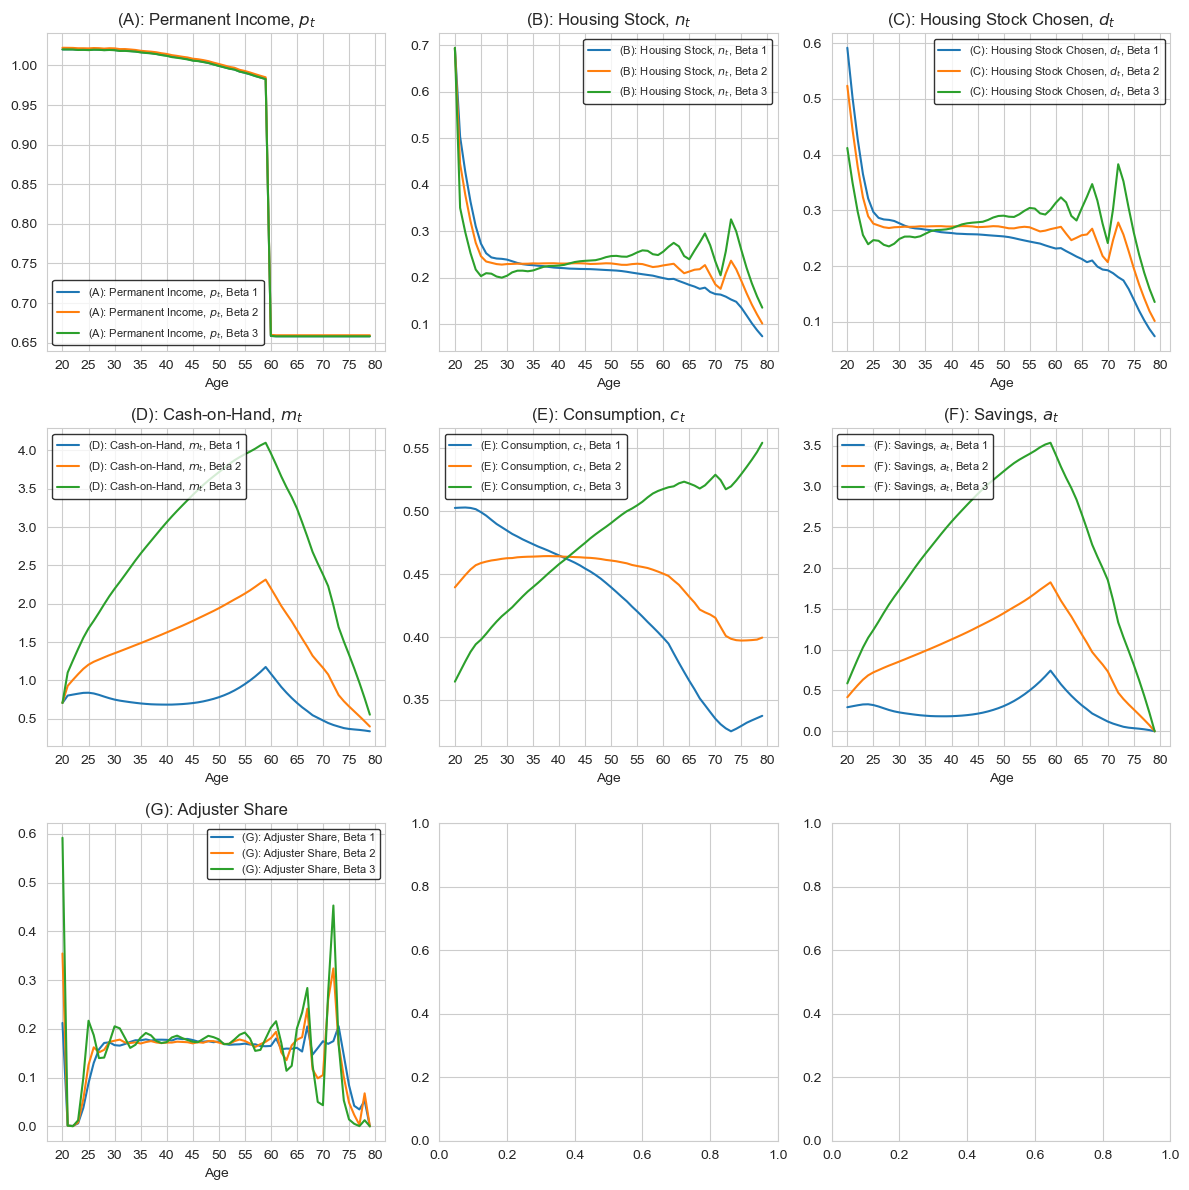

In [4]:
model_negm.lifecycle()

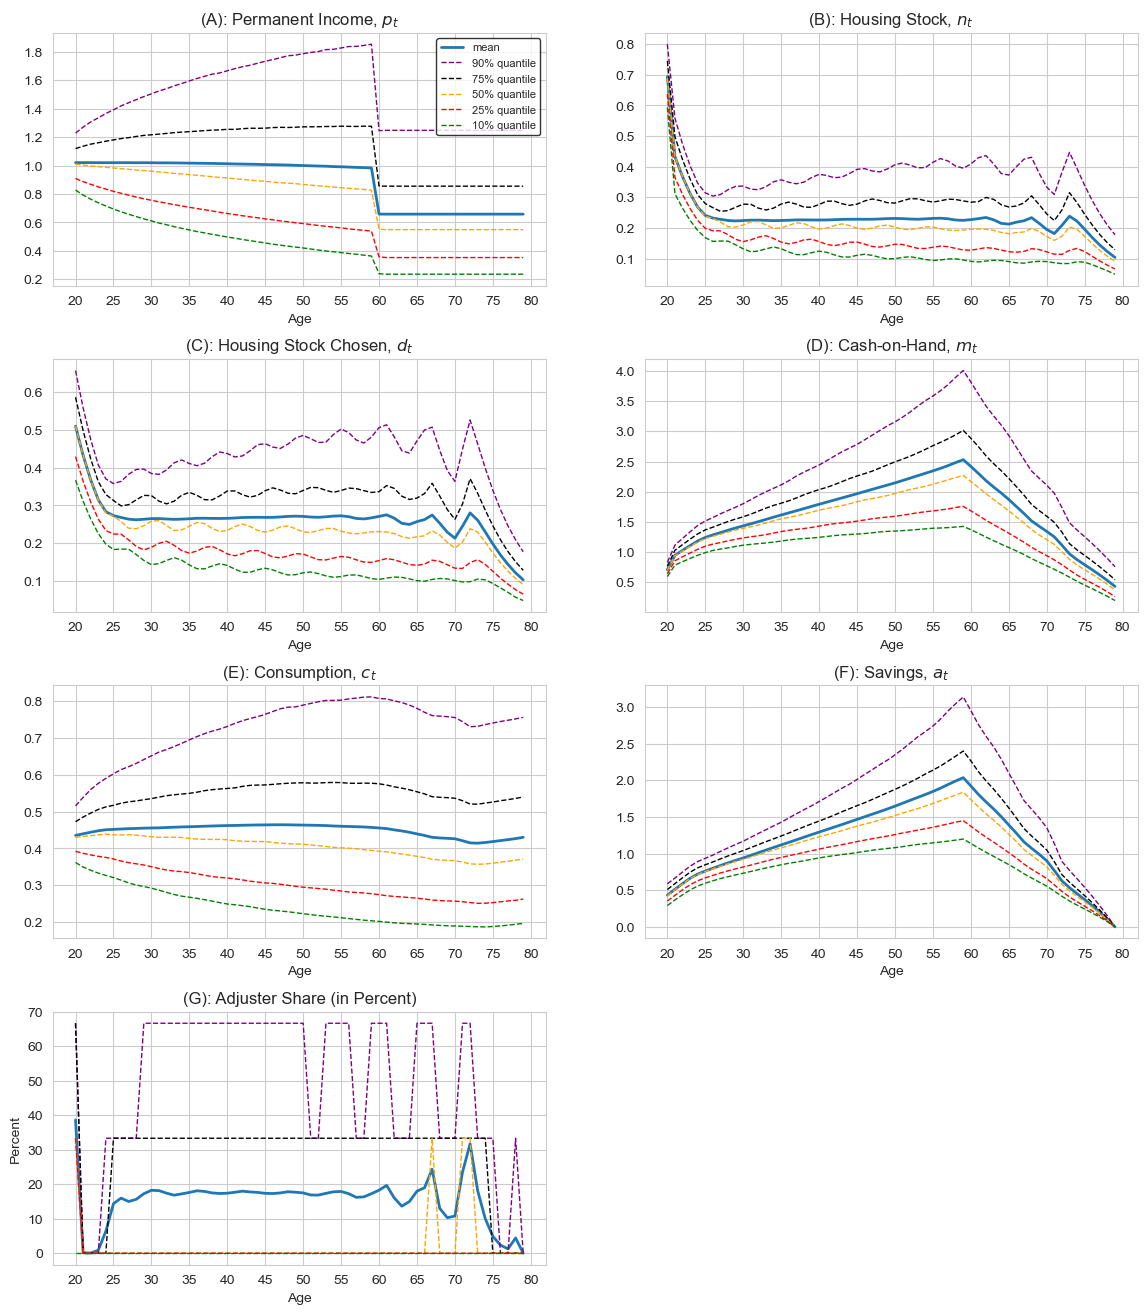

In [6]:
model_negm.lifecycle_rand()

# Tax Shocks

## Transitory Anticipated Tax Increase

Create a copy of the original model solve with NEGM and implement anticipated transitory tax increase in period 20 (i.e. 21):

In [5]:
model_negm_trans5pct = model_negm.copy()
model_negm_trans5pct.par.tax_rate_vec[20] = model_negm.par.tax_rate_vec[20]*1.05

Check tax array to see that a transitory shock has been implemented:

In [6]:
# ensuring tax has hikened
model_negm_trans5pct.par.tax_rate_vec

array([0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  , 0.5355, 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  ])

Solve and simulate new model with anticipated transitory shock:

In [7]:
model_negm_trans5pct.solve()
model_negm_trans5pct.simulate()

solving the model
Period: 59
Beta index: 0
Beta index: 1
Beta index: 2
Period: 58
Beta index: 0
Beta index: 1
Beta index: 2
Period: 57
Beta index: 0
Beta index: 1
Beta index: 2
Period: 56
Beta index: 0
Beta index: 1
Beta index: 2
Period: 55
Beta index: 0
Beta index: 1
Beta index: 2
Period: 54
Beta index: 0
Beta index: 1
Beta index: 2
Period: 53
Beta index: 0
Beta index: 1
Beta index: 2
Period: 52
Beta index: 0
Beta index: 1
Beta index: 2
Period: 51
Beta index: 0
Beta index: 1
Beta index: 2
Period: 50
Beta index: 0
Beta index: 1
Beta index: 2
Period: 49
Beta index: 0
Beta index: 1
Beta index: 2
Period: 48
Beta index: 0
Beta index: 1
Beta index: 2
Period: 47
Beta index: 0
Beta index: 1
Beta index: 2
Period: 46
Beta index: 0
Beta index: 1
Beta index: 2
Period: 45
Beta index: 0
Beta index: 1
Beta index: 2
Period: 44
Beta index: 0
Beta index: 1
Beta index: 2
Period: 43
Beta index: 0
Beta index: 1
Beta index: 2
Period: 42
Beta index: 0
Beta index: 1
Beta index: 2
Period: 41
Beta index: 0
Bet

C:\Users\olive\AppData\Local\Temp\ipykernel_9648\2090847022.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


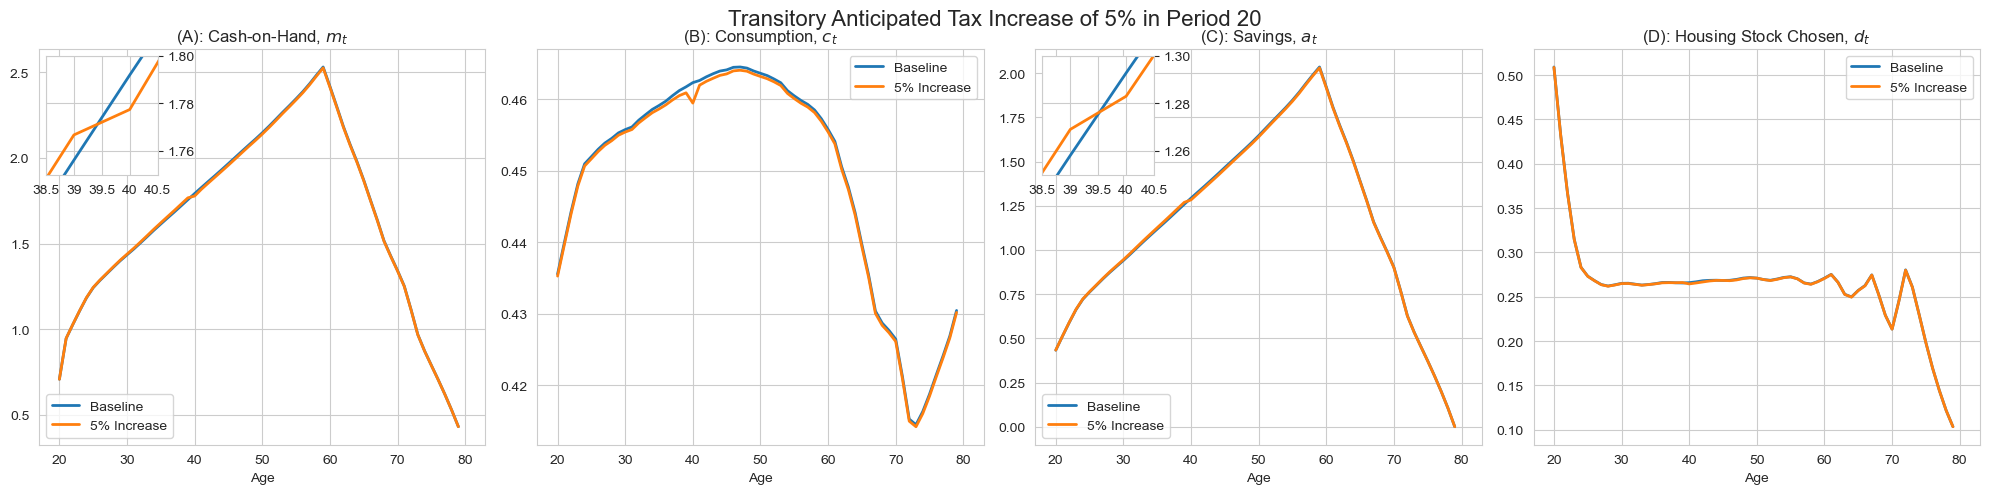

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_trans5pct = model_negm_trans5pct.sim

simvarlist = [('m','(A): Cash-on-Hand, $m_t$'),
              ('c','(B): Consumption, $c_t$'),
              ('a','(C): Savings, $a_t$'),
              ('d','(D): Housing Stock Chosen, $d_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Transitory Anticipated Tax Increase of 5% in Period 20", fontsize=16)

age = np.arange(par.T)

for i, (simvar, simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim, simvar)
    simdata_trans5pct = getattr(sim_trans5pct, simvar)
    
    axs[i].plot(age, np.mean(simdata, axis=(1,2)), lw=2, label='Baseline')
    axs[i].plot(age, np.mean(simdata_trans5pct, axis=(1,2)), lw=2, label='5% Increase')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('Age')
    axs[i].set_title(simvarlatex)

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    new_xticks = xticks + 20
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

    # create zoom-in inset plot on the first graph
    if i == 0 or i == 2:
        axs[i].legend(loc='lower left')
        
        axins = inset_axes(axs[i], width="25%", height="30%", loc='upper left')
        axins.plot(age, np.mean(simdata, (1,2)), lw=2)
        axins.plot(age, np.mean(simdata_trans5pct, (1,2)), lw=2)

        # specify the limits for the zoomed-in plot
        axins.set_xlim(18.5, 20.5)
        axins.set_ylim(1.75, 1.8) if i == 0 else axins.set_ylim(1.25, 1.3)

        # Move labels to right
        axins.yaxis.tick_right()
        axins.yaxis.set_label_position("right")

        # Change x-axis labels for inset axes to show 20 years later
        xticks = axins.get_xticks()
        new_xticks = xticks + 20
        axins.set_xticks(xticks[::2])
        axins.set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks[::2]])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the layout so that title does not overlap with the top plot
plt.show()


## Permanent Anticipated Tax Increase

Create a copy of the original model solve with NEGM and anticipated permanent tax increase in period 20 (i.e., 21):

In [9]:
model_negm_5pct = model_negm.copy()
model_negm_5pct.par.tax_rate_vec[20:] = model_negm.par.tax_rate_vec[20:]*1.05

Check tax array to see that a permanent increase has been implemented:

In [10]:
model_negm_5pct.par.tax_rate_vec

array([0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  , 0.51  ,
       0.51  , 0.51  , 0.51  , 0.51  , 0.5355, 0.5355, 0.5355, 0.5355,
       0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355,
       0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355,
       0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355,
       0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355, 0.5355,
       0.5355, 0.5355, 0.5355, 0.5355])

Solve and simulate new model with permanent shock:

In [11]:
model_negm_5pct.solve()
model_negm_5pct.simulate()

solving the model
Period: 59
Beta index: 0
Beta index: 1
Beta index: 2
Period: 58
Beta index: 0
Beta index: 1
Beta index: 2
Period: 57
Beta index: 0
Beta index: 1
Beta index: 2
Period: 56
Beta index: 0
Beta index: 1
Beta index: 2
Period: 55
Beta index: 0
Beta index: 1
Beta index: 2
Period: 54
Beta index: 0
Beta index: 1
Beta index: 2
Period: 53
Beta index: 0
Beta index: 1
Beta index: 2
Period: 52
Beta index: 0
Beta index: 1
Beta index: 2
Period: 51
Beta index: 0
Beta index: 1
Beta index: 2
Period: 50
Beta index: 0
Beta index: 1
Beta index: 2
Period: 49
Beta index: 0
Beta index: 1
Beta index: 2
Period: 48
Beta index: 0
Beta index: 1
Beta index: 2
Period: 47
Beta index: 0
Beta index: 1
Beta index: 2
Period: 46
Beta index: 0
Beta index: 1
Beta index: 2
Period: 45
Beta index: 0
Beta index: 1
Beta index: 2
Period: 44
Beta index: 0
Beta index: 1
Beta index: 2
Period: 43
Beta index: 0
Beta index: 1
Beta index: 2
Period: 42
Beta index: 0
Beta index: 1
Beta index: 2
Period: 41
Beta index: 0
Bet

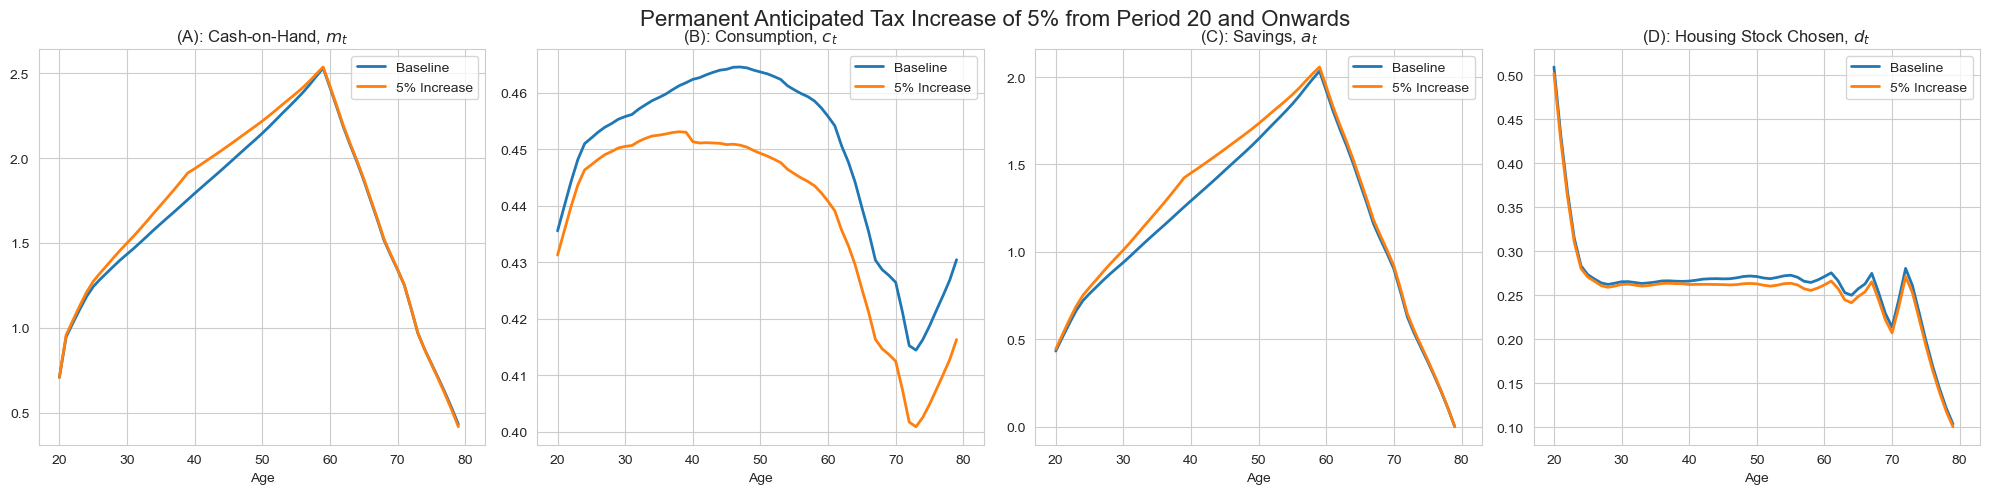

In [12]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_5pct = model_negm_5pct.sim

simvarlist = [('m','(A): Cash-on-Hand, $m_t$'),
              ('c','(B): Consumption, $c_t$'),
              ('a','(C): Savings, $a_t$'),
              ('d','(D): Housing Stock Chosen, $d_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Permanent Anticipated Tax Increase of 5% from Period 20 and Onwards", fontsize=16)

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim,simvar)
    simdata_5pct = getattr(sim_5pct,simvar)

    axs[i].plot(age, np.mean(simdata, axis=(1,2)), lw=2, label='Baseline')
    axs[i].plot(age, np.mean(simdata_5pct, axis=(1,2)), lw=2, label='5% Increase')

    


    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('Age')
    axs[i].set_title(f'{simvarlatex}')

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    axs[i].set_xticks(xticks)  # Set tick positions, this line is actually redundant here because it's the same as before
    new_xticks = xticks + 20
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()

## Uanticipated Tax Increase

Create a copy of the original model solve with EGM and *unanticipated* permanent tax increase in period 20 (i.e., 21):

In [13]:
model_unanticipated5pct = model_negm.copy()

Replace the periods after 20 from the old_tax simulation with the new_tax simulation

In [14]:
for var in ['m', 'c', 'a','d']:
    sim_old = getattr(model_negm.sim, var)
    sim_new = getattr(model_negm_5pct.sim, var)
    sim_combined = np.copy(sim_old)  # Create a copy of the old simulation
    sim_combined[20:] = sim_new[20:]  # Replace the periods after 20 with the new simulation

    # Set the combined simulation in the original model
    setattr(model_unanticipated5pct.sim, f'{var}', sim_combined)

Checking They Jump to Correct (New) Optimal Path:

In [15]:
print(
    np.mean(model_negm.sim.c[10,:,0]),
    np.mean(model_unanticipated5pct.sim.c[10,:,0]),
    np.mean(model_unanticipated5pct.sim.c[30,:,0]),
    np.mean(model_negm_5pct.sim.c[30,:,0]),
)

0.4333285718422233 0.4333285718422233 0.6253121558899785 0.6253121558899785


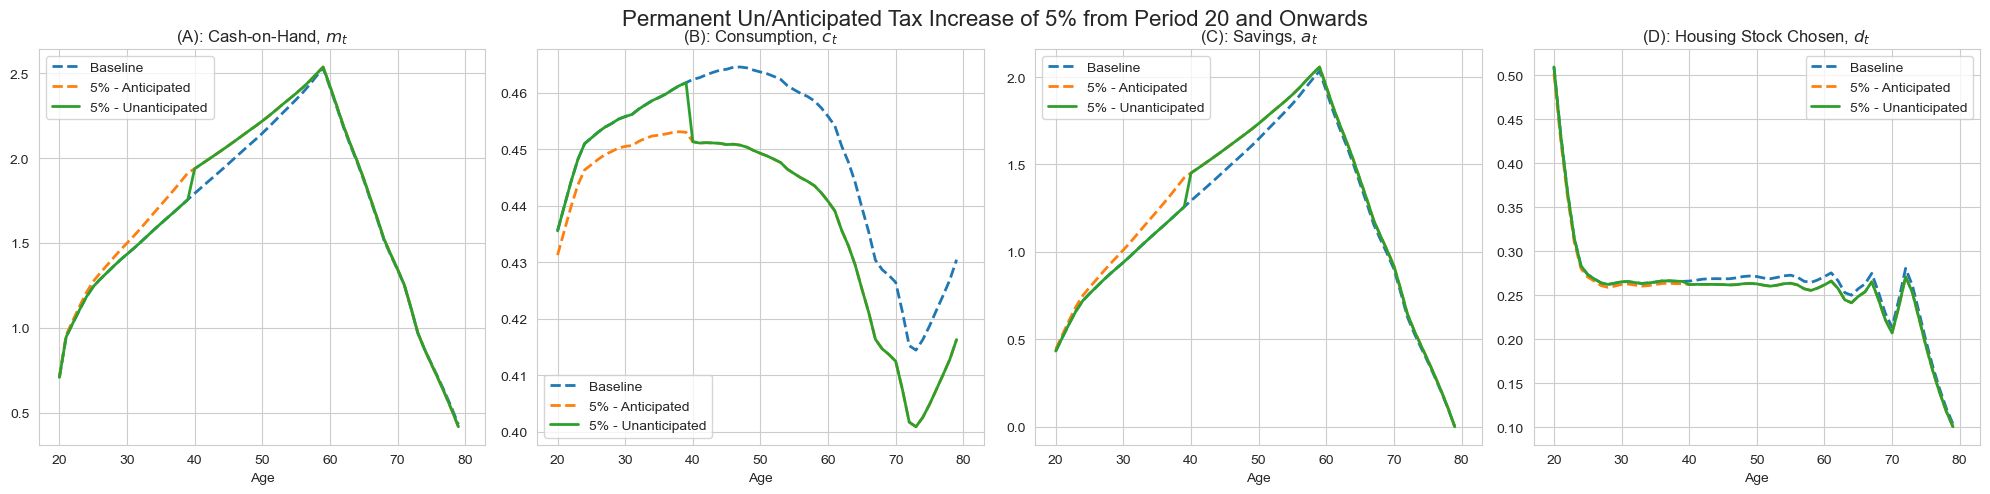

In [16]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_5pct = model_negm_5pct.sim
sim_unanticipated = model_unanticipated5pct.sim

simvarlist = [('m','(A): Cash-on-Hand, $m_t$'),
              ('c','(B): Consumption, $c_t$'),
              ('a','(C): Savings, $a_t$'),
              ('d','(D): Housing Stock Chosen, $d_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Permanent Un/Anticipated Tax Increase of 5% from Period 20 and Onwards", fontsize=16)

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim, simvar)
    simdata_5pct = getattr(sim_5pct, simvar)
    simdata_unanticipated = getattr(sim_unanticipated, simvar)  # data from combined model

    axs[i].plot(age, np.mean(simdata, axis=(1,2)), lw=2, linestyle = '--',label='Baseline')
    axs[i].plot(age, np.mean(simdata_5pct, axis=(1,2)), lw=2,linestyle = '--', label='5% - Anticipated')
    axs[i].plot(age, np.mean(simdata_unanticipated, axis=(1,2)), lw=2, label='5% - Unanticipated')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('Age')
    axs[i].set_title(f'{simvarlatex}')

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    axs[i].set_xticks(xticks)  # Set tick positions, this line is actually redundant here because it's the same as before
    new_xticks = xticks + 20
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()

Combine graphs into one plot:

In [27]:
def get_key(varname):
        """ fetch name associated with variable """
        variabel_name = {
                            "Transitory Anticipated Tax Increase of 5% in Period 20"                                :0,
                            "Transitory Anticipated Tax Increase of 5% in Period 20 and Onwards"                    :1, 
                            "Permanent Un/Anticipated Tax Increase of 5% from Period 20 and Onward"                 :2
                            }
        
        for key, value in variabel_name.items():
            if value == varname:
                 return key

C:\Users\olive\AppData\Local\Temp\ipykernel_9648\1218206975.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


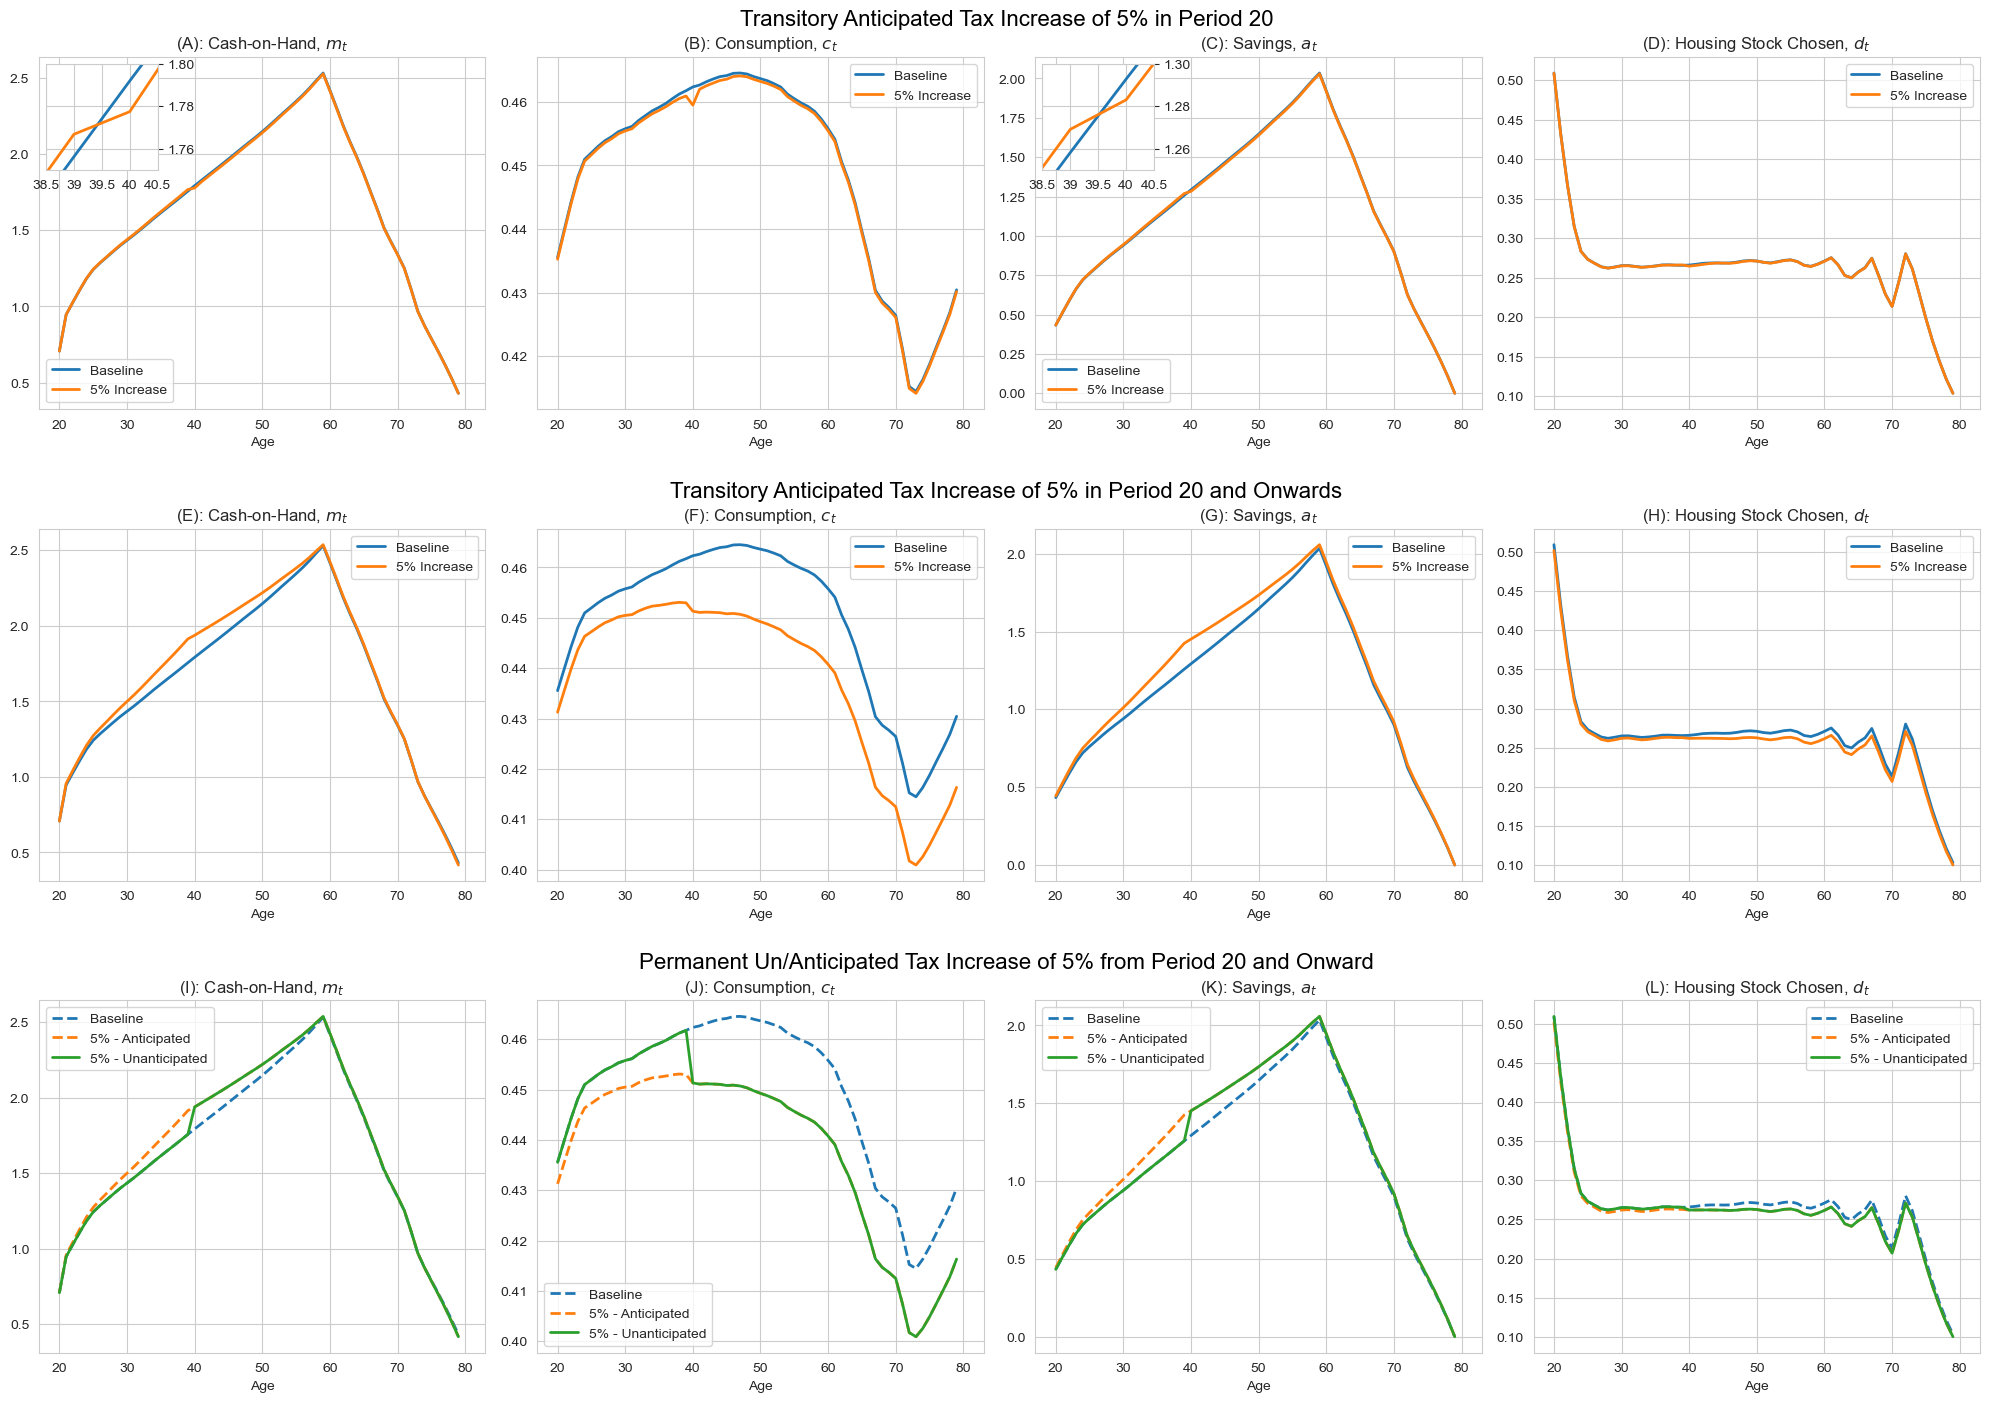

In [36]:
# a. initiate figure
fig, big_axes = plt.subplots( figsize=(20,15), nrows=3, ncols = 1)

for cols, big_ax in enumerate(big_axes):
    big_ax.axis('off')
    for cols,big_ax in enumerate(big_axes):
        big_ax.set_title(f'{get_key(cols)} \n', size = 16, color = 'black')

# b. create subplots
# row 1: "Transitory Anticipated Tax Increase of 5% in Period 20"

# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_trans5pct = model_negm_trans5pct.sim

simvarlist = [('m','(A): Cash-on-Hand, $m_t$'),
              ('c','(B): Consumption, $c_t$'),
              ('a','(C): Savings, $a_t$'),
              ('d','(D): Housing Stock Chosen, $d_t$')]

# Create subplots within the large figure instead of creating a new figure
axs = [fig.add_subplot(3, len(simvarlist), i+1) for i in range(len(simvarlist))]

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim,simvar)
    simdata_trans5pct = getattr(sim_trans5pct,simvar)

    axs[i].plot(age, np.mean(simdata, axis=(1,2)), lw=2, label='Baseline')
    axs[i].plot(age, np.mean(simdata_trans5pct, axis=(1,2)), lw=2, label='5% Increase')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('Age')
    axs[i].set_title(f'{simvarlatex}')

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    axs[i].set_xticks(xticks)  # Set tick positions, this line is actually redundant here because it's the same as before
    new_xticks = xticks + 20
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

    # create zoom-in inset plot on the first graph
    if i == 0 or i == 2:
        axs[i].legend(loc='lower left')
        
        axins = inset_axes(axs[i], width="25%", height="30%", loc='upper left')
        axins.plot(age, np.mean(simdata, (1,2)), lw=2)
        axins.plot(age, np.mean(simdata_trans5pct, (1,2)), lw=2)

        # specify the limits for the zoomed-in plot
        axins.set_xlim(18.5, 20.5)
        axins.set_ylim(1.75, 1.8) if i == 0 else axins.set_ylim(1.25, 1.3)

        # Move labels to right
        axins.yaxis.tick_right()
        axins.yaxis.set_label_position("right")

        # Change x-axis labels for inset axes to show 20 years later
        xticks = axins.get_xticks()
        new_xticks = xticks + 20
        axins.set_xticks(xticks[::2])
        axins.set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks[::2]])


# row 2: "Transitory Anticipated Tax Increase of 5% in Period 20 and Onwards"

# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_5pct = model_negm_5pct.sim

simvarlist = [('m','(E): Cash-on-Hand, $m_t$'),
              ('c','(F): Consumption, $c_t$'),
              ('a','(G): Savings, $a_t$'),
              ('d','(H): Housing Stock Chosen, $d_t$')]

# Create subplots within the large figure instead of creating a new figure
axs = [fig.add_subplot(3, len(simvarlist), i+5) for i in range(len(simvarlist))]

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim,simvar)
    simdata_5pct = getattr(sim_5pct,simvar)

    axs[i].plot(age, np.mean(simdata, axis=(1,2)), lw=2, label='Baseline')
    axs[i].plot(age, np.mean(simdata_5pct, axis=(1,2)), lw=2, label='5% Increase')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('Age')
    axs[i].set_title(f'{simvarlatex}')

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    axs[i].set_xticks(xticks)  # Set tick positions, this line is actually redundant here because it's the same as before
    new_xticks = xticks + 20
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

# row 3: "Permanent Un/Anticipated Tax Increase of 5% from Period 20 and Onwards"

# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_5pct = model_negm_5pct.sim
sim_unanticipated = model_unanticipated5pct.sim

simvarlist = [('m','(I): Cash-on-Hand, $m_t$'),
              ('c','(J): Consumption, $c_t$'),
              ('a','(K): Savings, $a_t$'),
              ('d','(L): Housing Stock Chosen, $d_t$')]

# Create subplots within the large figure instead of creating a new figure
axs = [fig.add_subplot(3, len(simvarlist), i+9) for i in range(len(simvarlist))]

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim, simvar)
    simdata_5pct = getattr(sim_5pct, simvar)
    simdata_unanticipated = getattr(sim_unanticipated, simvar)  # data from combined model

    axs[i].plot(age, np.mean(simdata, axis=(1,2)), lw=2, linestyle = '--',label='Baseline')
    axs[i].plot(age, np.mean(simdata_5pct, axis=(1,2)), lw=2,linestyle = '--', label='5% - Anticipated')
    axs[i].plot(age, np.mean(simdata_unanticipated, axis=(1,2)), lw=2, label='5% - Unanticipated')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('Age')
    axs[i].set_title(f'{simvarlatex}')

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    axs[i].set_xticks(xticks)  # Set tick positions, this line is actually redundant here because it's the same as before
    new_xticks = xticks + 20
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

if not os.path.exists("../plots"):
    os.makedirs("../plots")
    
plt.savefig("../plots/two_asset_TaxShocks.pdf", bbox_inches='tight')


# MPC

In [ ]:
model_negm.simulate()

In [ ]:
# unpack 
par = model_negm.par
sim = model_negm.sim
sol = model_negm.sol

### MPC Over the Life Cycle

In [ ]:
# beta values
betas = [0.93, 0.95, 0.97]  # add more values if num_betas > 3

# Different colors for different lines
colors = ['red', 'blue', 'green', 'black']  # add more colors if num_betas > 3

# Different line styles for different lines
line_styles = ['-.', '--', ':', '-']  # add more styles if num_betas > 3

# x-axis labels
age = np.arange(par.T) + par.Tmin

# Plot each beta index
for beta in range(len(betas)):
    plt.plot(age, np.mean(sim.mpc[:, beta, :]*100, axis=1), lw=2, color=colors[beta], linestyle=line_styles[beta], label=r'$\beta=$' + str(betas[beta]))

# mean over beta and individual dimensions
mean_mpc_aggregate = np.mean(sim.mpc*100, axis=(1, 2))

# Plot aggregate over beta and individuals
plt.plot(age, mean_mpc_aggregate, lw=2, color='purple', linestyle='-', label='Aggregate')

# Set labels and fontsize
plt.xlabel('Age', fontsize=13)
plt.ylabel('$\mathcal{MPC}$ (in percent)', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Show legend
plt.legend()

if not os.path.exists("../plots"):
    os.makedirs("../plots")
    
plt.savefig("../plots/two_asset_LifecycleMPC.pdf", bbox_inches='tight')

plt.show()

In [ ]:
# define stages
stages = {
    'aggregate': (slice(None), slice(None), slice(None)),
    'working': (slice(model_negm.par.Tr-1), slice(None), slice(None)),
    'retirement': (slice(model_negm.par.Tr, None), slice(None), slice(None)),
}

# number of betas (assuming 3, adjust according to your data)
num_betas = 3

# store results in a dictionary
results = {}

# aggregate across all betas
for stage_name, stage_slice in stages.items():
    # calculate and store the mean
    results[f'mean_mpc_{stage_name}'] = np.mean(model_negm.sim.mpc[stage_slice]) * 100

# mean values for each beta index
for beta in range(num_betas):
    for stage_name, stage_slice in stages.items():
        # update the slice for the current beta
        beta_slice = (stage_slice[0], beta, stage_slice[2])
        # calculate and store the mean
        results[f'mean_mpc_{stage_name}_beta{beta}'] = np.mean(model_negm.sim.mpc[beta_slice]) * 100

# access results
for key, value in results.items():
    print(f'{key}: {value:.1f} pct.')

### MPC for Different Cohorts

In [ ]:
from consav import linear_interp

# unpack 
par = model_negm.par
sim = model_negm.sim
sol = model_negm.sol

p_bar = np.mean(sim.p,axis=1)
n_bar = np.mean(sim.n,axis=1)

# allocate memory
c0 = np.zeros(shape=(par.T,len(par.Betas), len(par.grid_m)))
c1 = np.zeros(shape=(par.T,len(par.Betas), len(par.grid_m)))
mpc = np.zeros(shape=(par.T,len(par.Betas), len(par.grid_m)))

for t in range(par.T):
    for b in range(len(par.Betas)):
        for i,m in enumerate(par.grid_m):
            c0[t,b,i] = linear_interp.interp_3d(
                    par.grid_p,par.grid_n,par.grid_m,sol.c_keep[t,b],
                    p_bar[t,b],n_bar[t,b],m)
            c1[t,b,i] = linear_interp.interp_3d(
                    par.grid_p,par.grid_n,par.grid_m,sol.c_keep[t,b],  
                    p_bar[t,b],n_bar[t,b],m+par.eps)
            mpc[t,b,i] = (c1[t,b,i]-c0[t,b,i])/par.eps

fig, axs = plt.subplots(1, len(par.Betas), figsize=(15, 5))

for b in range(len(par.Betas)):
    for t in np.arange(0,par.T,10):
        axs[b].plot(par.grid_m, np.mean(mpc[t:t+9,b,:]*100,axis=0), label='t={}-{}'.format(t+par.Tmin,t+par.Tmin+9), lw=2.3)
        axs[b].set_xlim([0, 5])  # sets x-axis limit
        axs[b].set_ylim([0, 105])  # sets y-axis limit
        axs[b].set_title(r'$\beta$ = {:.2f}'.format(par.Betas[b]), fontsize=14)  # sets title for each subplot
        axs[b].set_xlabel('Cash-on-hand, $m_t$',fontsize=14)
        
        # Add legend to the first plot
        if b == 0:
            axs[b].legend(fontsize=14) 
            axs[b].set_ylabel('$\mathcal{MPC}_t$ (in %)',fontsize=14) 

plt.tight_layout()
plt.show()

# Alternative Solution Methods

Solve with NVFI

In [2]:
model_nvfi = DurableConsumptionModelClass(name='example_nvfi',par={'solmethod':'nvfi','do_print':False})
model_nvfi.precompile_numba() # solve with very coarse grids
model_nvfi.solve()
model_nvfi.simulate()

precompiling numba functions
solving the model
Period: 1
Beta index: 0
Beta index: 1
Beta index: 2
Period: 0
Beta index: 0
Beta index: 1
Beta index: 2
numba precompile done
solving the model
Period: 59
Beta index: 0
Beta index: 1
Beta index: 2
Period: 58
Beta index: 0
Beta index: 1
Beta index: 2
Period: 57
Beta index: 0
Beta index: 1
Beta index: 2
Period: 56
Beta index: 0
Beta index: 1
Beta index: 2
Period: 55
Beta index: 0
Beta index: 1
Beta index: 2
Period: 54
Beta index: 0
Beta index: 1
Beta index: 2
Period: 53
Beta index: 0
Beta index: 1
Beta index: 2
Period: 52
Beta index: 0
Beta index: 1
Beta index: 2
Period: 51
Beta index: 0
Beta index: 1
Beta index: 2
Period: 50
Beta index: 0
Beta index: 1
Beta index: 2
Period: 49
Beta index: 0
Beta index: 1
Beta index: 2
Period: 48
Beta index: 0
Beta index: 1
Beta index: 2
Period: 47
Beta index: 0
Beta index: 1
Beta index: 2
Period: 46
Beta index: 0
Beta index: 1
Beta index: 2
Period: 45
Beta index: 0
Beta index: 1
Beta index: 2
Period: 44
Bet

In [ ]:
# a. unpack
par = model_nvfi.par
sim = model_nvfi.sim

# b. figure
fig, axs = plt.subplots(len(par.Betas), 1, figsize=(10, 8))

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$'),
             ('p','$p_t$')]

age = np.arange(par.T)

for b in range(len(par.Betas)):  # loop over beta dimension
    ax = axs[b]  # specify the current subplot

    for simvar, simvarlatex in simvarlist:
        # get simulation data
        simdata = getattr(sim, simvar)

        # calculate mean over individual dimension for each beta
        mean_data = np.mean(simdata[:, b, :], axis=1)

        # plot mean data
        ax.plot(age, mean_data, label=simvarlatex)

    ax.grid(True)
    ax.set_xlabel('age')
    ax.set_title(f'Beta {b+1}')
    ax.legend()

# adjust layout for better visualization
plt.tight_layout()
plt.show()

Solve model with VFI:

In [ ]:
#model_vfi = DurableConsumptionModelClass(name='example_vfi',par={'solmethod':'vfi','do_print':False})
#model_vfi.precompile_numba() # solve with very coarse grids
#model_vfi.solve()
#model_vfi.simulate()

## Timing the model solution methods

### Timing function

In [ ]:
def run(name = 'baseline',
        rep = 1, # set to 5 in the paper
        load = False,
        solmethod = 'negm',
        updpar = {},
        do_print = False):
    
    # a. create model
    par = {'solmethod':solmethod,'do_print':do_print,**updpar}
    model = DurableConsumptionModelClass(name=name,load=load,par=par)
    
    # b. run
    if load == False:
        
        model.precompile_numba()        
        
        # ii. best of three
        best_time = np.inf
        for it in range(rep):
            
            model.solve()
            total_time = np.sum(model.par.time_w+model.par.time_keep+model.par.time_adj)
            
            if total_time < best_time:
            
                best_time = total_time
                time_w = model.par.time_w.copy()
                time_keep = model.par.time_keep.copy()
                time_adj= model.par.time_adj.copy()
            
            print(f'{it}: total time = {total_time:.2f}')
                
        # iii. collect infomation
        model.simulate(do_euler_error=True)
        model.par.time_w = time_w.copy()
        model.par.time_keep = time_keep.copy()
        model.par.time_adj= time_adj.copy()
        model.save()
            
    # c. print progress
    print('')    
    model.print_analysis()        
    model.checksum(simple=True)
    print('')
    
    return model

### Settings

In [ ]:
models = dict()

basename = 'results'
#T = 2
#base = dict()
#base['T'] = T

### Timings

In [ ]:
models['negm']  = run(name=f'{basename}', solmethod='negm')

In [ ]:
models['nvfi']  = run(name=f'{basename}', solmethod='nvfi')

In [ ]:
#models['vfi']   = run(name=f'{basename}', solmethod='vfi')

### Time tables

In [ ]:
import tabs
#main_models = [models['negm'],models['nvfi'],models['vfi']]
main_models = [models['negm'],models['nvfi']]
tabs.all(main_models,speedup=True)